### Sales Data Analysis

## Analyzing sales data to find trends, patterns, and insights.
## Data Source:Kaggle

In [1]:
# Load and clean the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the CSV file
df = pd.read_csv("C:\\Users\\okead\\Downloads\\Sales-Export_2019-2020.csv")



In [5]:
# Clean column names by stripping whitespace
df.columns = [col.strip() for col in df.columns]

In [6]:
# Convert order_value_EUR and cost to numeric, removing commas
df['order_value_EUR'] = pd.to_numeric(df['order_value_EUR'].str.replace(',', ''), errors='coerce')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [7]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Calculate profit
df['profit'] = df['order_value_EUR'] - df['cost']

print("Data Overview:")
print(df.head())
print("\
Basic Statistics:")
print(df.describe())

Data Overview:
    country  order_value_EUR       cost       date  category  \
0    Sweden         17524.02   14122.61 2020-02-12     Books   
1   Finland        116563.40   92807.78 2019-09-26     Games   
2  Portugal        296465.56  257480.34 2019-07-11  Clothing   
3  Portugal         74532.02   59752.32 2020-04-02    Beauty   
4     Spain        178763.42  146621.76 2019-12-22     Games   

       customer_name    sales_manager           sales_rep device_type  \
0    Goldner-Dibbert     Maxie Marrow       Madelon Bront      Mobile   
1   Hilll-Vandervort       Hube Corey         Wat Bowkley      Mobile   
2     Larkin-Collier  Celine Tumasian  Smitty Culverhouse          PC   
3  Hessel-Stiedemann  Celine Tumasian        Aurelie Wren          PC   
4     Johns and Sons     Emalia Dinse     Bertha Walbrook      Tablet   

     order_id    profit  
0  70-0511466   3401.41  
1  28-6585323  23755.62  
2  58-7703341  38985.22  
3  14-6700183  14779.70  
4  15-8765160  32141.66  
Basic

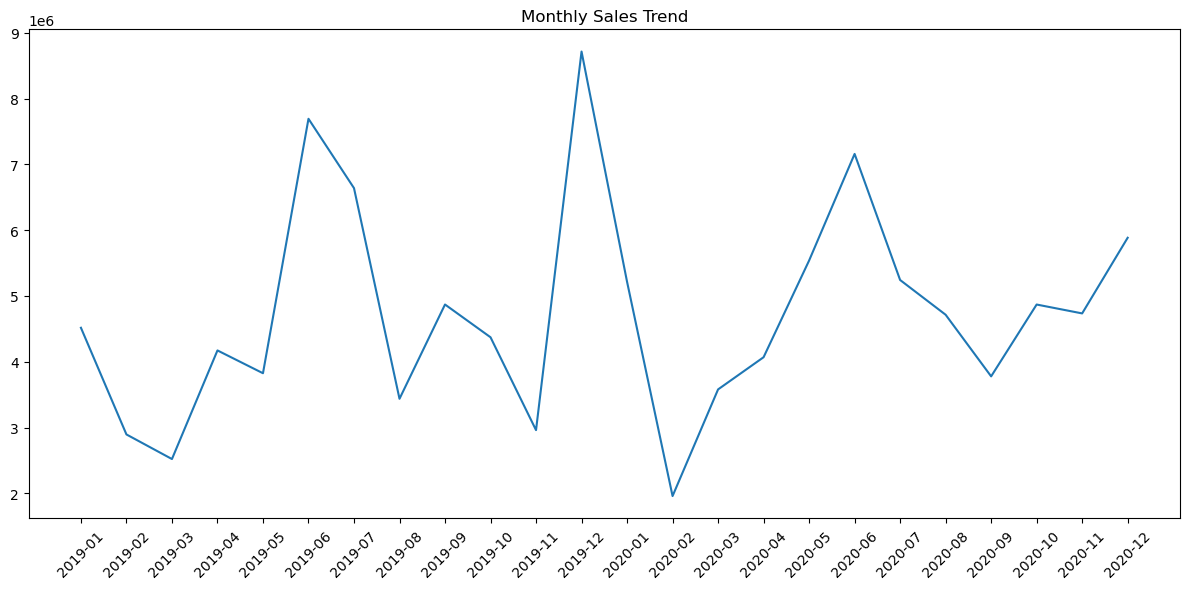

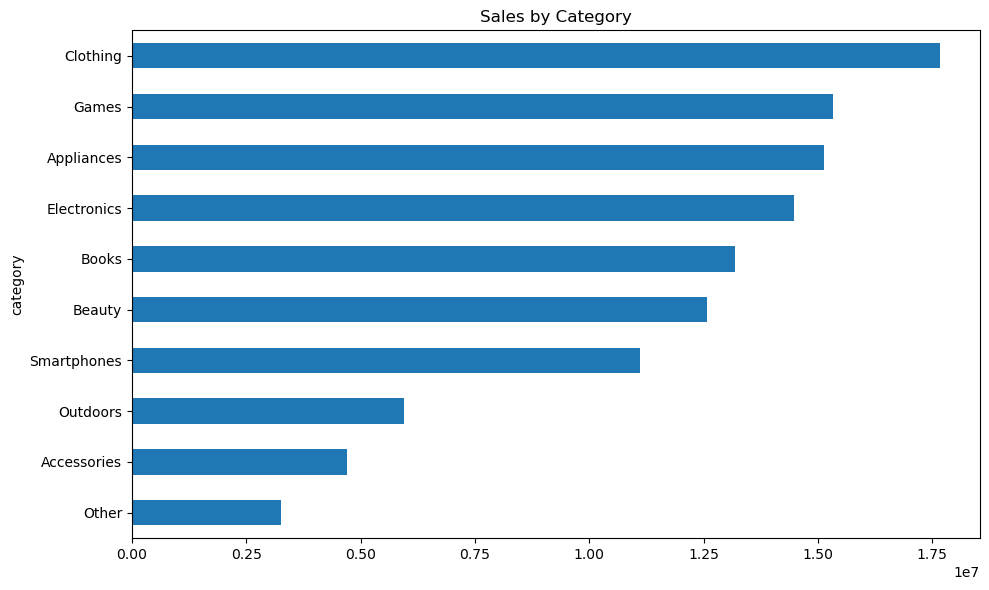

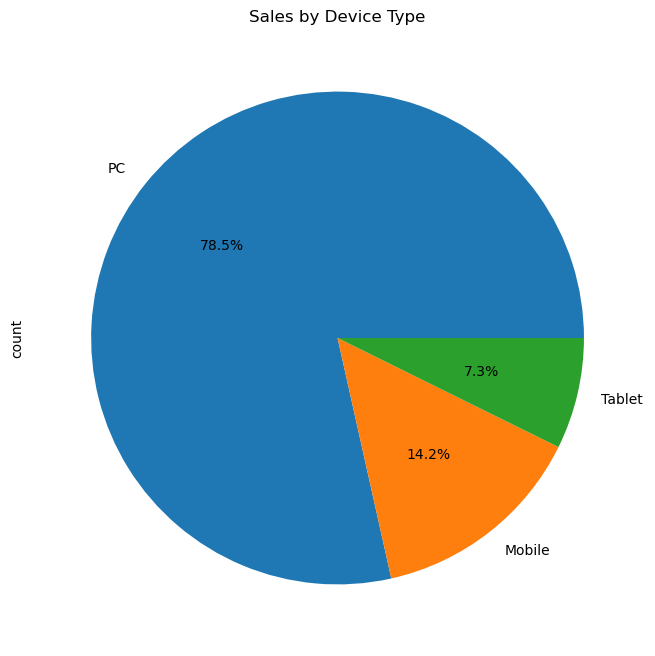

Key Metrics:
Total Revenue: € 113,361,738.71
Total Profit: € 18,992,427.72
Average Order Value: € 113,361.74
Profit Margin:  16.8 %


In [9]:
# Create visualizations for key insights
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['order_value_EUR'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].astype(str)
plt.plot(monthly_sales['date'], monthly_sales['order_value_EUR'])
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

# Top categories by sales
plt.figure(figsize=(10, 6))
df.groupby('category')['order_value_EUR'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Sales by Category')
plt.tight_layout()
plt.show()

# Device type distribution
plt.figure(figsize=(8, 8))
df['device_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Device Type')
plt.show()

# Print key metrics
print("\
Key Metrics:")
print("Total Revenue: \u20ac", format(df['order_value_EUR'].sum(), ',.2f'))
print("Total Profit: \u20ac", format(df['profit'].sum(), ',.2f'))
print("Average Order Value: \u20ac", format(df['order_value_EUR'].mean(), ',.2f'))
print("Profit Margin: ", format((df['profit'].sum() / df['order_value_EUR'].sum()) * 100, '.1f'), "%")

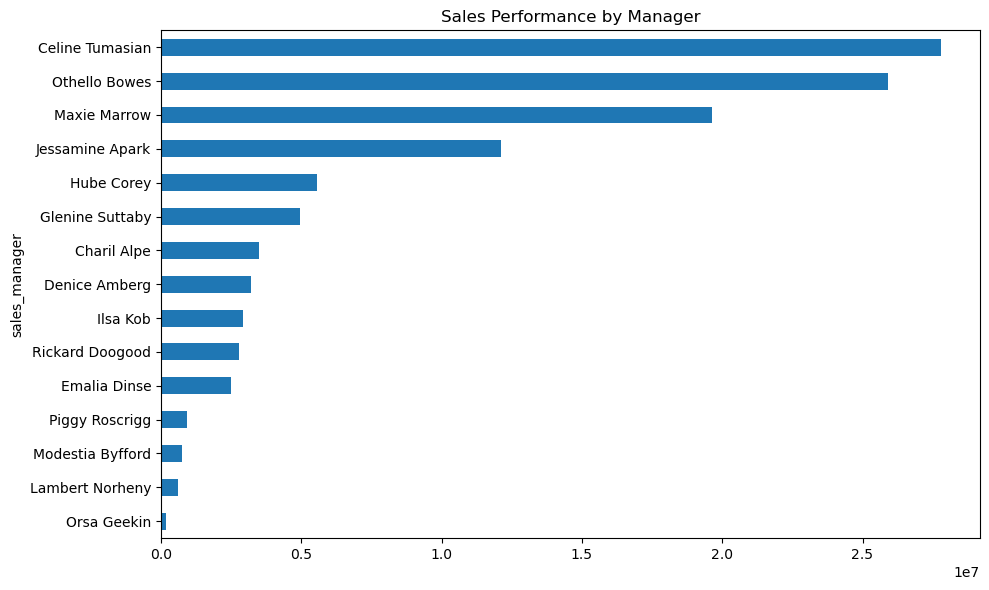

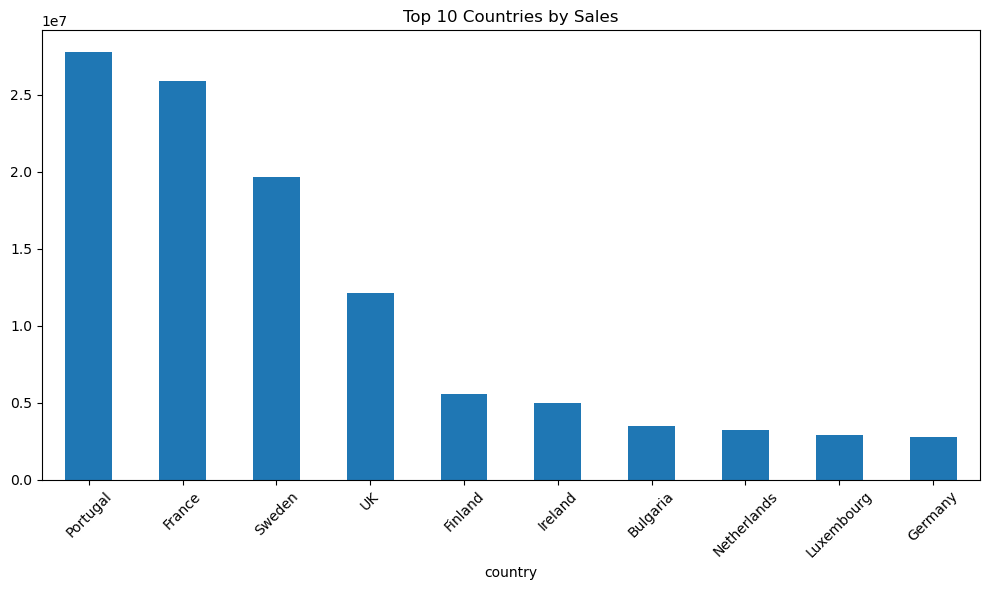

Top Performing Categories:
category
Clothing      17661682.13
Games         15321623.45
Appliances    15139668.73
Name: order_value_EUR, dtype: float64
Top Sales Managers:
sales_manager
Celine Tumasian    27796361.83
Othello Bowes      25900678.42
Maxie Marrow       19637204.45
Name: order_value_EUR, dtype: float64


In [10]:
# Top performing sales managers
plt.figure(figsize=(10, 6))
manager_performance = df.groupby('sales_manager')['order_value_EUR'].sum().sort_values(ascending=True)
manager_performance.plot(kind='barh')
plt.title('Sales Performance by Manager')
plt.tight_layout()
plt.show()

# Country analysis
plt.figure(figsize=(10, 6))
country_sales = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print top performing metrics
print("\
Top Performing Categories:")
print(df.groupby('category')['order_value_EUR'].sum().sort_values(ascending=False).head(3))

print("\
Top Sales Managers:")
print(df.groupby('sales_manager')['order_value_EUR'].sum().sort_values(ascending=False).head(3))

In [11]:
# Calculate key performance indicators
# Seasonal Analysis
df['month'] = df['date'].dt.month
seasonal_performance = df.groupby('month')['order_value_EUR'].agg(['mean', 'count', 'sum'])

# Customer Analysis
customer_value = df.groupby('customer_name')['order_value_EUR'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)

print("Seasonal Performance (Top 3 Months):")
print(seasonal_performance.sort_values('sum', ascending=False).head(3))

print("\
Top Customer Segments:")
print(customer_value.head(3))

# Calculate growth rate
df['year_month'] = df['date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['order_value_EUR'].sum()
growth_rate = ((monthly_revenue.iloc[-1] - monthly_revenue.iloc[0]) / monthly_revenue.iloc[0]) * 100

print("\
Year-over-Year Growth Rate: {:.1f}%".format(growth_rate))

Seasonal Performance (Top 3 Months):
                mean  count          sum
month                                   
6      165004.141778     90  14850372.76
12     189585.380390     77  14598074.29
7      156331.127237     76  11881165.67
Top Customer Segments:
                                    sum  count           mean
customer_name                                                
Johns and Sons              16360257.32    142  115213.079718
Hessel-Stiedemann            6512063.88     55  118401.161455
Dickinson, Hyatt and Berge   2706730.32     24  112780.430000
Year-over-Year Growth Rate: 30.3%


In [12]:
# Final ROI and efficiency metrics
# Calculate ROI per category
category_roi = df.groupby('category').agg({
    'order_value_EUR': 'sum',
    'cost': 'sum',
    'profit': 'sum'
}).assign(ROI=lambda x: (x['profit'] / x['cost']) * 100)

# Sales efficiency by rep
rep_efficiency = df.groupby('sales_rep').agg({
    'order_value_EUR': 'sum',
    'profit': 'sum',
    'order_id': 'count'
}).assign(avg_deal_size=lambda x: x['order_value_EUR'] / x['order_id'])

print("Category ROI:")
print(category_roi.sort_values('ROI', ascending=False)[['ROI']].head())


Category ROI:
                  ROI
category             
Outdoors    21.644711
Books       20.320437
Beauty      20.270798
Other       20.230064
Appliances  20.110446


c:\Users\okead\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


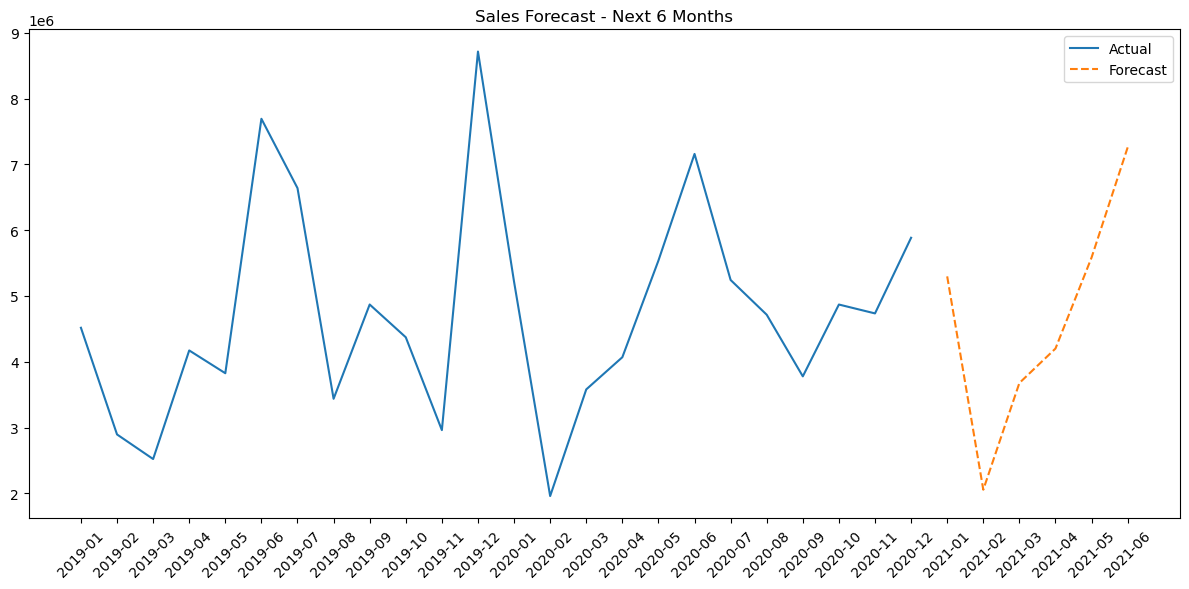

Customer Churn Risk (Customers with long gaps between orders):
                                min        max  count  days_between  \
customer_name                                                         
Abbott, Roberts and Torp 2019-03-23 2020-12-20      2           638   
Rath-Schroeder           2019-04-26 2020-11-12      2           566   
Marquardt-Kuvalis        2019-03-29 2020-08-25      2           515   
Stamm Inc                2019-01-27 2020-10-05      4           617   
Baumbach Group           2019-06-04 2020-03-20      2           290   

                          avg_days_between_orders  
customer_name                                      
Abbott, Roberts and Torp                   319.00  
Rath-Schroeder                             283.00  
Marquardt-Kuvalis                          257.50  
Stamm Inc                                  154.25  
Baumbach Group                             145.00  
Territory Performance (Top 5):
         order_value_EUR                 pro

In [13]:
# Create sales forecast
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Prepare time series data
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['order_value_EUR'].sum()
model = ExponentialSmoothing(monthly_sales, 
                           seasonal_periods=12,
                           trend='add', 
                           seasonal='add').fit()

# Generate forecast for next 6 months
forecast = model.forecast(6)

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Actual')
plt.plot(forecast.index.astype(str), forecast.values, label='Forecast', linestyle='--')
plt.title('Sales Forecast - Next 6 Months')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Customer churn analysis
customer_frequency = df.groupby('customer_name')['date'].agg(['min', 'max', 'count'])
customer_frequency['days_between'] = (customer_frequency['max'] - customer_frequency['min']).dt.days
customer_frequency['avg_days_between_orders'] = customer_frequency['days_between'] / customer_frequency['count']

print("\
Customer Churn Risk (Customers with long gaps between orders):")
print(customer_frequency.sort_values('avg_days_between_orders', ascending=False).head())

# Territory performance
territory_metrics = df.groupby('country').agg({
    'order_value_EUR': ['sum', 'mean'],
    'profit': ['sum', 'mean'],
    'order_id': 'count'
}).round(2)

print("\
Territory Performance (Top 5):")
print(territory_metrics.sort_values(('order_value_EUR', 'sum'), ascending=False).head())

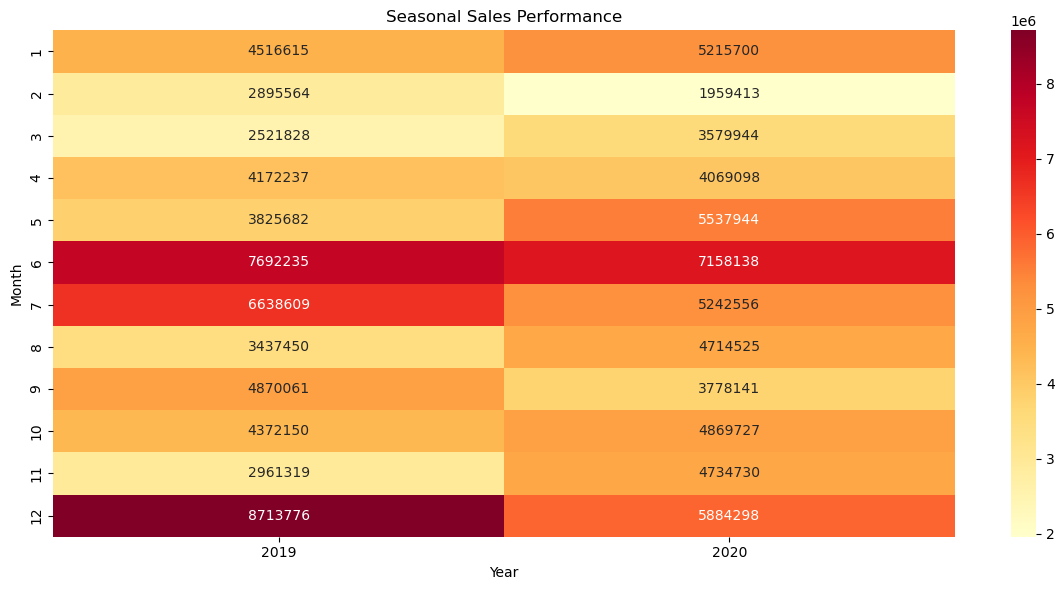

Territory Growth Rates (%):
country
Austria               inf
Netherlands    117.425977
Belgium         66.444313
Portugal        37.110584
Denmark         26.833322
Finland         18.596193
Ireland         14.478297
Italy            3.591723
Germany         -1.789549
UK             -10.687078
Sweden         -11.239070
Bulgaria       -17.632926
France         -24.081284
Luxembourg     -25.777423
Spain          -32.228158
Name: growth_rate, dtype: float64
Top Customer Lifetime Value:
                           order_value_EUR                             date
                                     count          sum       mean <lambda>
customer_name                                                              
Johns and Sons                         142  16360257.32  115213.08      716
Hessel-Stiedemann                       55   6512063.88  118401.16      711
Dickinson, Hyatt and Berge              24   2706730.32  112780.43      592


In [14]:
# Create final performance dashboard metrics
import seaborn as sns

# 1. Market Penetration Analysis
territory_growth = df.pivot_table(
    values='order_value_EUR',
    index='country',
    columns=df['date'].dt.year,
    aggfunc='sum'
).fillna(0)

territory_growth['growth_rate'] = ((territory_growth[2020] - territory_growth[2019]) / territory_growth[2019] * 100)

# 2. Customer Retention Metrics
customer_lifetime = df.groupby('customer_name').agg({
    'order_value_EUR': ['count', 'sum', 'mean'],
    'date': lambda x: (x.max() - x.min()).days
}).round(2)

# 3. Seasonal Performance
seasonal_trends = df.groupby([df['date'].dt.month, df['date'].dt.year])['order_value_EUR'].sum().unstack()

# Plotting seasonal trends
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_trends, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Seasonal Sales Performance')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

print("\
Territory Growth Rates (%):")
print(territory_growth['growth_rate'].sort_values(ascending=False))

print("\
Top Customer Lifetime Value:")
print(customer_lifetime.sort_values(('order_value_EUR', 'sum'), ascending=False).head(3))